### Exercise 1

Try clustering the iris data.  Try different numbers of clusters. Print the confusion matrix that compares the cluster labels with the actual labels.  What seems to give the best clustering according to ground truth?  How do you know?

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
data = load_iris()
X = data.data
y = data.target

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
confusion_matrix(y,y_pred)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

In [20]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Exercise 2

Use the elbow method, the silhouette method, and the Davies-Bouldin method to evaluate your clustering result.  Do the data-driven methods provide clear guidance?

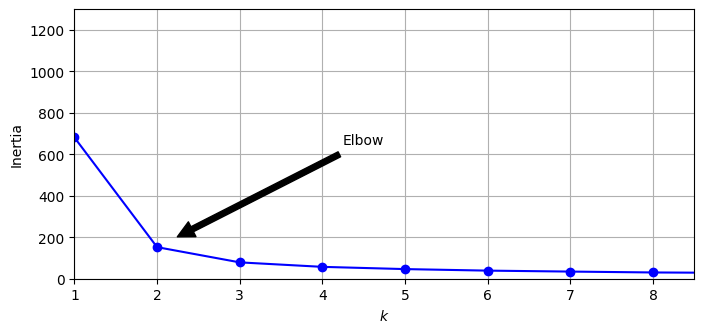

In [23]:
# extra code – this cell generates and saves Figure 9–8
from matplotlib import pyplot as plt
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(2, inertias[1]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

TypeError: '<=' not supported between instances of 'str' and 'int'

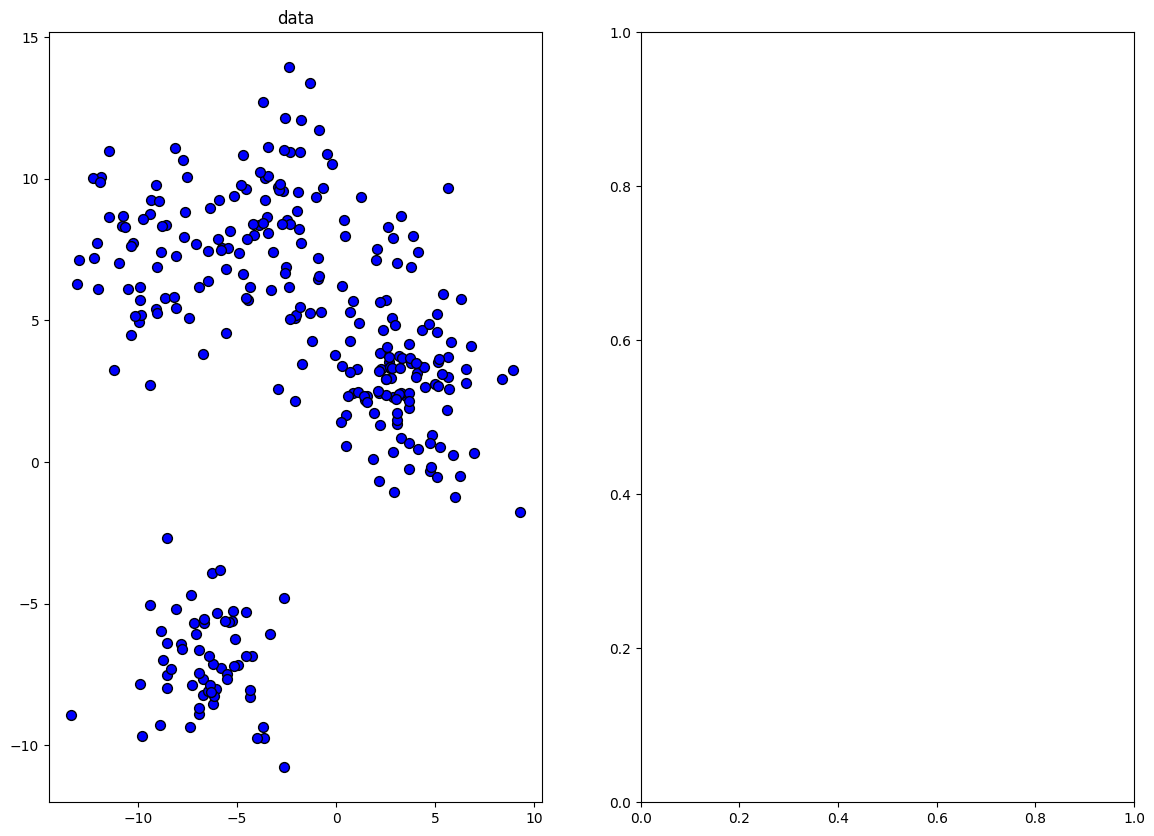

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Function to apply KMeans and plot silhouette graph
def plot_silhouette(ax, X, title):
    # List to store average silhouette scores for different number of clusters
    avg_silhouette_scores = []
    K = [3]  # Start from 2 as silhouette score requires at least 2 clusters
    
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        cluster_labels = kmeans.fit_predict(X)
        
        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        avg_silhouette_scores.append(silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        # Plot silhouette scores for each cluster
        y_lower = 10  # For space between silhouette plots of individual clusters
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
            y_lower = y_upper + 10

    ax.set_title(f"{title} - Average Silhouette Score: {silhouette_avg:.2f}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Plot data and silhouette graphs
plot_data(axes[0], X, 'data')
plot_silhouette(axes[1], X,'silhouette')

plt.tight_layout()
plt.show()

### Exercise 3

In the following example, MeanShift, SpectralClustering, DBScan and HDBScan to fit the data. For each clustering method, can you find parameter setting that result in approximately the same clustering?  How would you do this without visual inspection?

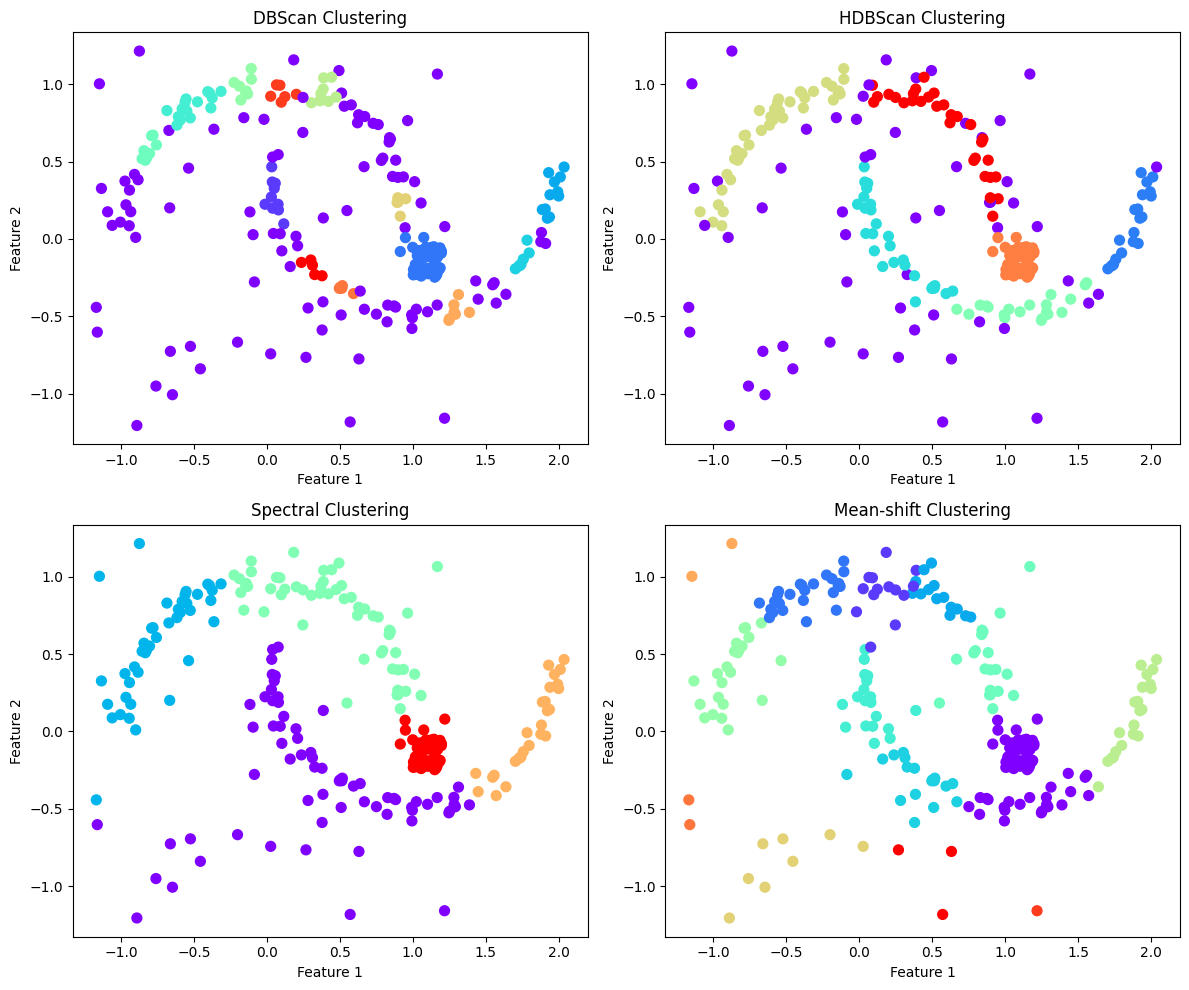

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering

# Spectral
spectral_labels = SpectralClustering(n_clusters=5, affinity='nearest_neighbors').fit_predict(data)

# Mean-Shift clustering
bandwidth= estimate_bandwidth(data, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(data)
ms_labels=ms.fit_predict(data)

# DBScan clustering
dbscan_labels = DBSCAN(eps=0.1, min_samples=5).fit_predict(data)

# HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit_predict(data)

# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12, 10))

ax1.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='rainbow', s=50)
ax1.set_title('DBScan Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data[:, 0], data[:, 1], c=hdbscan_labels, cmap='rainbow', s=50)
ax2.set_title('HDBScan Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

ax3.scatter(data[:, 0], data[:, 1], c=spectral_labels, cmap='rainbow', s=50)
ax3.set_title('Spectral Clustering')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

ax4.scatter(data[:, 0], data[:, 1], c=ms_labels, cmap='rainbow', s=50)
ax4.set_title('Mean-shift Clustering')
ax4.set_xlabel('Feature 1')
ax4.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

### Exercise 4

The following plot contains five clusters.  See if you can set the parameters of GMM to identify all clusters.

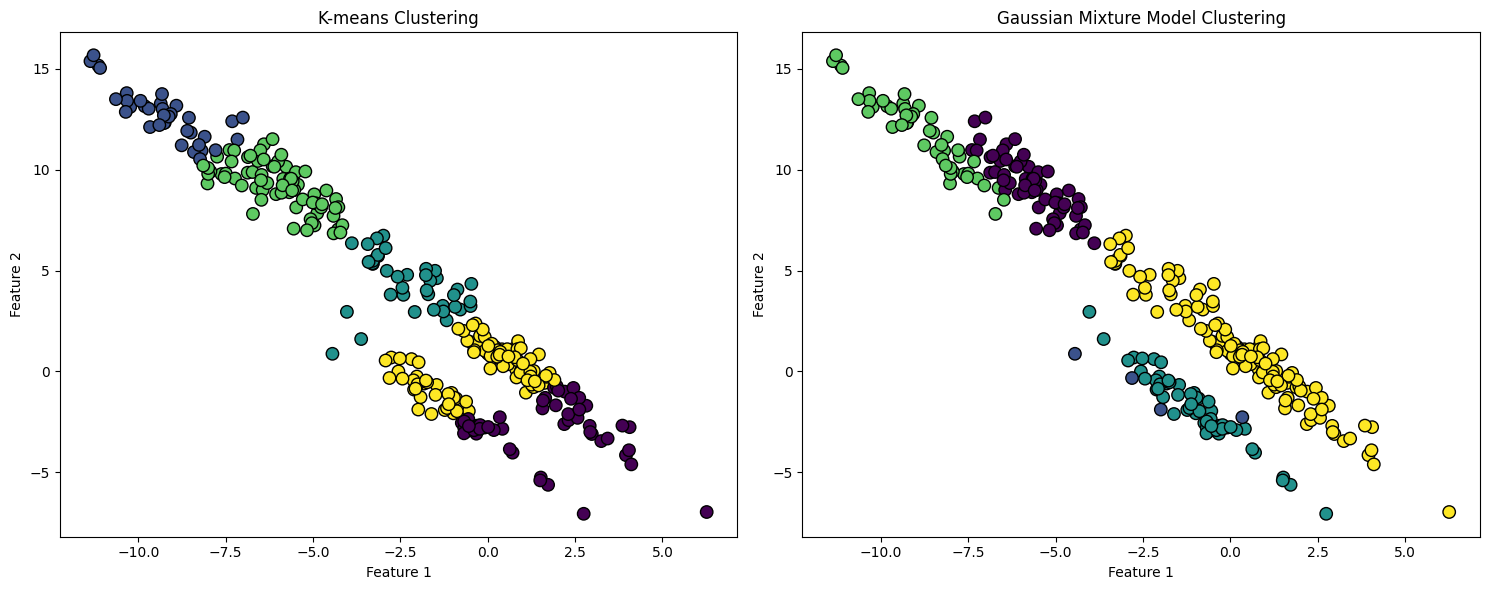

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
